# Закономерности, определяющие успешность компьютерной игры

Сборный проект №1 в рамках курса "Аналитик данных" на Практикуме от Яндекса.

Для интернет-магазина, который продает по всему миру компьютерные игры, необходимо выявить закономерности, определяющие успешность компьютерной игры. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

**Цель исследования** — выявить закономерности в данных, определяющие успешность игры . В дальнейшем, результаты исследования позволят сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Исходные данные:**

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


**Ход исследования:**

*Часть1. Изучение общей информации:*

* [1. Изученеие файлов с данными, получение общей информации, загрузка библиотек.](#1-bullet)


*Часть2. Подготовка данных:*

* [1.Замена названия столбцов (приведение к нижнему регистру)](#2-bullet)
* [2.Преобразование типов данных](#3-bullet)
* [3.Обработка пропусков дубликатов данных](#4-bullet)
* [4.Обработка пропусков данных](#5-bullet)
* [5.Подсчет суммарных продаж во всех регионах с созданием нового столбца](#6-bullet)


*Часть3. Исследовательский анализ данных:*

* [1.Исследование количества игр по годам](#7-bullet)
* [2.Исследование объема продаж по платформам](#8-bullet)
* [3.Отбор данных за актуальный период- определение периода, данные за который помогут  прогноз на 2017 год](#9-bullet)
* [4. Исследование глобальных продаж всех игр по платформам](#10-bullet)
* [5.Построение графика «ящик с усами» по глобальным продажам игр в разбивке по платформам](#11-bullet)
* [6. Исследование влияния отзывов пользователей и критиков на продажи игр для PS4](#12-bullet)
* [7.Распределение игр по жанрам](#13-bullet)


*Часть4.Портрет пользователя каждого региона:*

* [1.Топ-5 платформ в Северной Америке, Европе и Японии](#14-bullet)
* [2.Самые популярные жанры (топ-5) в Северной Америке, Европе и Японии](#15-bullet)
* [3.Влияние рейтинга ESRB на продажи в Северной Америке, Европе и Японии](#16-bullet)


*Часть 5. Проверка гипотез:*
* [1.Средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#17-bullet)
* [2.Средние пользовательские рейтинги жанров Action и Sports разные](#18-bullet)


*Часть 6. Общий вывод*
* [1.Общий вывод по исследованию](#19-bullet)

# 1. Изучение общей информации

<a id='1-bullet'></a>

## Изученеие файлов с данными, получение общей информации, загрузка библиотек

Открываю файл с данными и знакомлюсь с датасетом, чтобы иметь представление, с чем буду работать далее и провести первичный визуальный анализ данных.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


from datetime import datetime
from scipy import stats as st

In [2]:
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [3]:
display(data.head())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Из выведенной части таблицы видно, что в данных есть пропуски - их необходимо будет заполнить, столбец с годом выпуска не в целочисленных значениях- необходимо будет ззаменить на тип int.

На первый взгляд пропуски видны в столбцах с оценкой критиков, пользователей и возрастным ретингом. Так как мы не знаем, как собирались данные, эти пропуски могут следствием неправильного переноса из первоисточника или изначальным отсутсвием рейтинга, например такое может быть у старых игр.

Выводим общую информацию о датасете:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Из описания видно, что данные в столбце пользовательсктй рейтинг указаны с типом  object, их необходимо перевести в вещесттвенный тип.


**Вывод**: из первичного осмотра видно, что данные необходимо предобработать:


1) Требуется корректировка типов данных:
- Year_of_Release - некорректный тип, должен быть целочисленный;
- User_Score - некорректный тип, должен быть с плавающей точкой.

2) Привести наименование столбцов к нижнему регистру.

3) Есть пропуски в данных, необходимо проверить, возможно ли их заполнить.

## 2. Подготовка данных

<a id='2-bullet'></a>
### Замена названия столбцов (приведение к нижнему регистру);

In [5]:
#приведем к нижнему регистру название столбцов
data.columns = data.columns.str.lower()
#приведем к нижнему регистру название игр и платформ, чтобы избежать неявные дубликаты
data['platform'] = data['platform'].str.lower()
data['name'] = data['name'].str.lower()
#проверим, прошла ли замена названия столбцов успешно:
display(data.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,nes,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,gb,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<a id='3-bullet'></a>
### Преобразование типов данных

Заменим тип данных в необходимых столбцах:
- в годе выпуска (с вещественного — на целочисленный)
- в оценке пользователей (со строчного — на вещественный)

При попытке привести тип столбца user_score с помощью  метода to_numeric к числовому типу в коде ошибки было выявлено значение "tbd". Как было выявлено из сети Интернет данная аббревиатура расшифровыввается как To Be Determined, то есть "Будет определено", из этого следует, что это значенние может быть заменено на ноль или -1, чтобы эти данные не учитывать в дальнейшем. Заменим "tbd" на -1 и преобразуем тип данных в столбце.

In [6]:
print (data['user_score'].isna().sum())
round((data['user_score'].isna().sum()*100)/data.shape[0],2)

6701


40.09

Всего в столбце рейтинг пользователей пропущено 40% данных от общей выборки, так как рейтинг не подлежит восстановлению по каким-либо параметрам-заменим пропущенные значения на -1 и заменим тип данных.

In [7]:
#очистка данных от tbd и nan
data.loc[data['user_score']=='tbd','user_score']=-1
data['user_score'].fillna('-1',inplace=True)

#перевод в тип float
data['user_score'] = pd.to_numeric(data['user_score'], errors='raise')
data['user_score'].describe()

count    16715.000000
mean         2.689447
std          4.169833
min         -1.000000
25%         -1.000000
50%         -1.000000
75%          7.300000
max          9.700000
Name: user_score, dtype: float64

Теперь проверим данные с пропусками по годам.Выведем первые 10 строк с пропусками в данных по годам:

In [8]:
display(data.loc[data['year_of_release'].isna()].head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,ps2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,fifa soccer 2004,ps2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,lego batman: the videogame,wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe smackdown vs. raw 2006,ps2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,-1.0,NaN
609,space invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,-1.0,NaN
627,rock band,x360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,frogger's adventures: temple of the frog,gba,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,-1.0,E
678,lego indiana jones: the original adventures,wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,call of duty 3,wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,rock band,wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


Как видно из выведенной таблицы в некоторых названиях содержится год выпуска игры. Посмотрим сколько всего игр без даты выпуска.

In [9]:
data['year_of_release'].isna().sum()

269

Всего в 269 играх не указан год выпуска, это 1,61% от общей выборки. Восстанавливать данные по данному критерию из названия нецелесообразно

In [10]:
no_year=data.loc[data['year_of_release'].isna()]

In [11]:
no_year['total_sales']=no_year[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis='columns')
round((no_year['total_sales'].sum()*100)/(data['na_sales']+data['eu_sales']\
                                          +data['jp_sales']+data['other_sales']).sum(),2)

1.11

Так как суммарные продажи по строкам с пропущенным годом выпуска составляют 1,1 процент от всех продаж, считаю, что 269 строк можно удалить.

In [12]:
data.shape[0]

16715

In [13]:
#удаляем данные с отсутсвующим годом выпуска, чтобы заменить тип значений столбца
data=data.dropna(subset=['year_of_release'])
data['year_of_release']=data['year_of_release'].astype(int)

In [14]:
data.shape[0]

16446

<a id='4-bullet'></a>
### Обработка пропусков дубликатов данных

Проверим, есть ли дубликаты в данных.

In [15]:
data.duplicated().sum()

0

Явных строк дубликатов нет.

In [16]:
#посмотрим, как часто повторяются названия игр и с чем это может быть связано
print(data['name'].value_counts())

need for speed: most wanted               12
lego marvel super heroes                   9
ratatouille                                9
fifa 14                                    9
terraria                                   8
                                          ..
loving life with hello kitty & friends     1
scrabble (others sales)                    1
viva pinata: party animals                 1
sands of destruction                       1
haitaka no psychedelica                    1
Name: name, Length: 11426, dtype: int64


Есть повторяющиеся названия игр, скорее всего данный факт связан с тем, что они выпущены на разных платформах, проверим эту теорию.

In [17]:
#Выведем сводную таблицу- название игр и количество платформ, на которых они выложены
games_repeated=data.pivot_table(index=['name'],values=['platform'], aggfunc='count')\
.sort_values(by='platform', ascending=False)
games_repeated[games_repeated['platform'] > 1]

,platform
name,
need for speed: most wanted,12
ratatouille,9
lego marvel super heroes,9
fifa 14,9
madden nfl 07,8
...,...
mario & sonic at the olympic games,2
corpse party: blood covered - repeated fear,2
xiaolin showdown,2


 Как видно, при повторяющихся названиях платформы у игр разные, возьмем для подробного рассмотрения игру, которая повторяется 12 раз-"need for speed: most wanted".

In [18]:
data.loc[data['name'] == 'need for speed: most wanted']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,need for speed: most wanted,ps2,2005,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,need for speed: most wanted,ps3,2012,Racing,0.71,1.46,0.06,0.58,NaN,-1.0,NaN
1190,need for speed: most wanted,x360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,need for speed: most wanted,x360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,need for speed: most wanted,xb,2005,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,need for speed: most wanted,psv,2012,Racing,0.33,0.45,0.01,0.22,NaN,-1.0,NaN
3581,need for speed: most wanted,gc,2005,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,need for speed: most wanted,pc,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,need for speed: most wanted,wiiu,2013,Racing,0.13,0.12,0.00,0.02,NaN,-1.0,NaN
6410,need for speed: most wanted,ds,2005,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


Дубли в наименовании обоснованы тем, что представляют разные реализации одной игры для разных платформ c разными годами реализации, поэтому делаем вывод6 что такие дубликаты мы удалять не будем, так как для кадой платформы идт свои уникальные показатели.

<a id='5-bullet'></a>
### Обработка пропусков данных

Узнаем количество пропущенных значений в данных и процент от общей выборки.

In [19]:
data.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score            0
rating             6678
dtype: int64

In [20]:
round((data.isna().sum()*100)/len(data),2)

name                0.01
platform            0.00
year_of_release     0.00
genre               0.01
na_sales            0.00
eu_sales            0.00
jp_sales            0.00
other_sales         0.00
critic_score       51.46
user_score          0.00
rating             40.61
dtype: float64

Пропущено 2 названия игры, возможно, при заполнении данных, возникли сложности с переводом названия игр, поэтому их оставили пустыми. Пропуски составляют 0.01 процент от общей выборки, значит эти строки можно удалить.

Также пропущены 2 значения столбца жанры. возможно, это те же самые строки, где нет названия игр. процент пропуска также сотавляет 0.01%, что является статистически незначимой величиной. удаляем строки с этими пропусками.

В оценке критиков пропущено 8578 строк с данными, это 51,46% от всей выборки, удалить данные значенеия невозможно, так как это приведет к чрезвычайному искажению данных.Заполним пропуски на 0.

Пропущено 40,61% данных с рейтингом ESRB.воостановить данне не получится, на как рейтинг на разных прлощадках может быть разным.

Ранее были заполнены пропуски по рейтингу пользователей на ноль.

In [21]:
# посмотрим на строки с пропущенными названиями, те же ли это строки, где не указан жанр:
display(data.loc[data['name'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993,NaN,1.78,0.53,0.00,0.08,NaN,-1.0,NaN
14244,NaN,gen,1993,NaN,0.00,0.00,0.03,0.00,NaN,-1.0,NaN


Как видно из выведенной таблицы строки с пропущенными названиями и жанрами- одни и те же строки, а значит жанр восстановить не получится, удаляем эти строки.

In [22]:
data=data.dropna(subset=['name'])
#  проверяем, удалились ли строки корректно
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score            0
rating             6676
dtype: int64

Пропущены значения оценок критиков и рейтингов ESRB. Поскольку точно заменить пропущенные значения не представляется возможным, заменим пропущенные значения на -1 и "no_rating"(так как у столбца "рейтинг" строковые значения)

In [23]:
data['critic_score'].fillna('-1',inplace=True)
data['critic_score'] = pd.to_numeric(data['critic_score'], errors='raise')
data['rating'].fillna('no_rating',inplace=True)
#проверим все ли пропуски заполнены
data.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [24]:
 data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


<a id='6-bullet'></a>
### Подсчет суммарных продаж во всех регионах с созданием нового столбца

In [25]:
data['total_sales']=data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']
display(data.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,nes,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,no_rating,40.24
2,mario kart wii,wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,no_rating,31.38


**ВЫВОД:**

В части предобработки данных было сделано следующее:
- приведены названия столбцов к нижнему регистру
- замена типов данных в годах выпуска и в оценке пользователей: в годе выпуска (с вещественного — на целочисленный), в оценке пользователей (со строчного — на вещественный)
- пропуски в годах выпуска игр были удалены в связи с небольшим количеством таких данны.
- в оценке пользователей пропуски были заменены на -1
- строки с пропуском названий игр были удаленны, это оказались те же строки, где пропущен жанр. 
- пропуски в данных оценки критиков и рейтинге ESRB были промаркированы -1 ввиду того, что точным образом их обработать нельзя на данном этапе
- родсчитаны суммарные продажи по всем регионам и выведены в новый столбец "total_sales"

## Шаг 3. Исследовательский анализ данных

<a id='7-bullet'></a>
### Исследование количества игр по годам

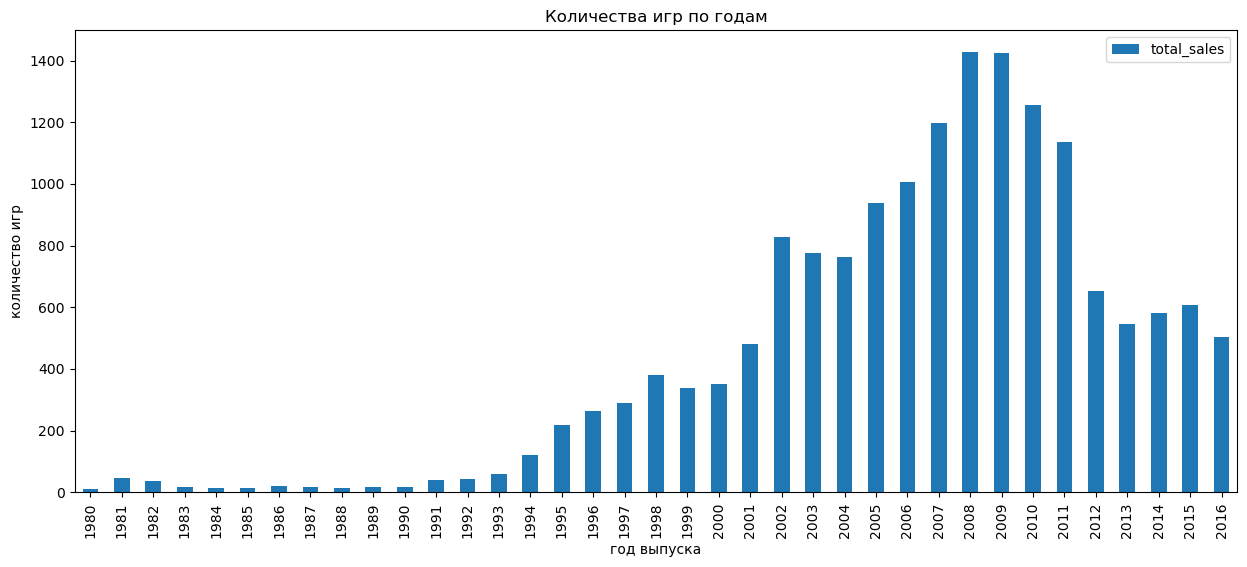

In [26]:
(data.pivot_table(index='year_of_release', values='total_sales',aggfunc='count')\
 .plot(kind='bar',figsize=(15, 6)))
plt.title('Количества игр по годам')
plt.xlabel('год выпуска')
plt.ylabel('количество игр')
plt.show()

Судя по графику, игровая индустрия активно начала развиваться после 1994 года, поэтому данные до 1994 года могут быть не интересны для настоящего анализа. Наибольшее количество игр выпущено в 2008-2009 годах, далее наблюдается заметное снижение, объемы выпускаемых игр вышли на уровень ниже объемов 2003-2004 годов.
Такое снижение можно объяснить появлением мобильных игр и мобильных платформ.

In [27]:
games_unique=data.drop_duplicates(subset=['name','year_of_release'],keep='first')
games_unique.groupby('year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      40
1992      41
1993      59
1994     117
1995     215
1996     258
1997     282
1998     364
1999     326
2000     325
2001     428
2002     631
2003     546
2004     550
2005     657
2006     773
2007     884
2008    1039
2009    1001
2010     900
2011     779
2012     446
2013     335
2014     319
2015     362
2016     297
Name: name, dtype: int64

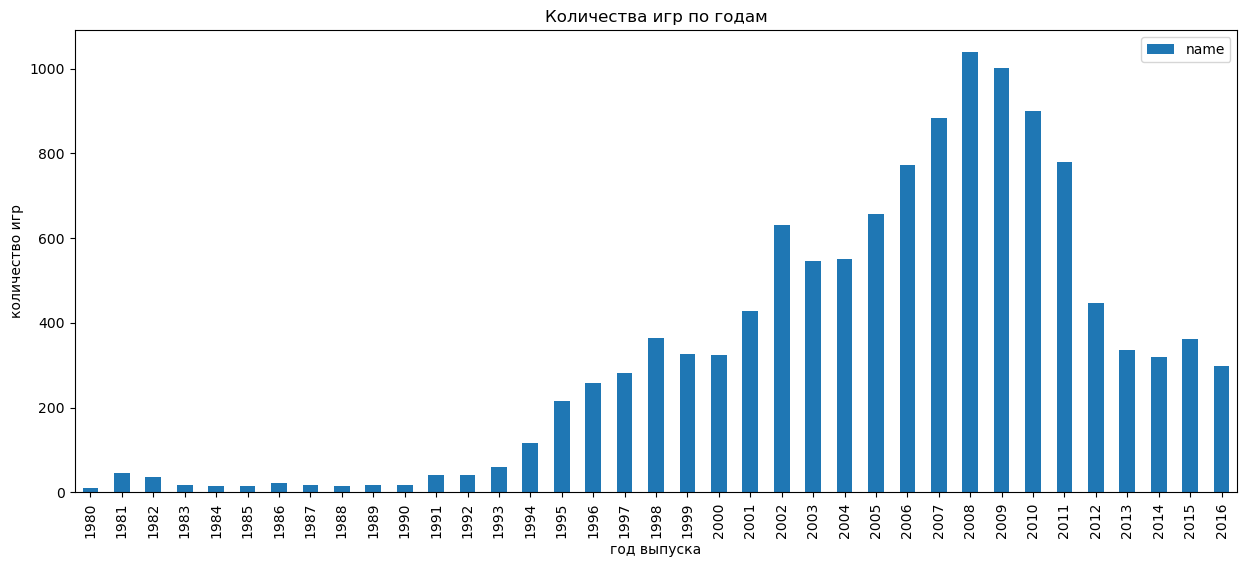

In [28]:
# построим график выпуска по очищенным данным
(games_unique.pivot_table(index='year_of_release', values='name',aggfunc='count')\
 .plot(kind='bar',figsize=(15, 6)))
plt.title('Количества игр по годам')
plt.xlabel('год выпуска')
plt.ylabel('количество игр')
plt.show()

Как видно из графика, с 1994 года идет рост выпуска игр, пик пришелся на 2008-2009 год, график по "чистому" выпуску игр идентичен по виду  графику выпуска игр по продажам в разбивке по годам.

<a id='8-bullet'></a>
### Исследование объема продаж по платформам

Рассмотрим объемы продаж игр по платформам в распределении по годам.

<Axes: xlabel='year_of_release', ylabel='platform'>

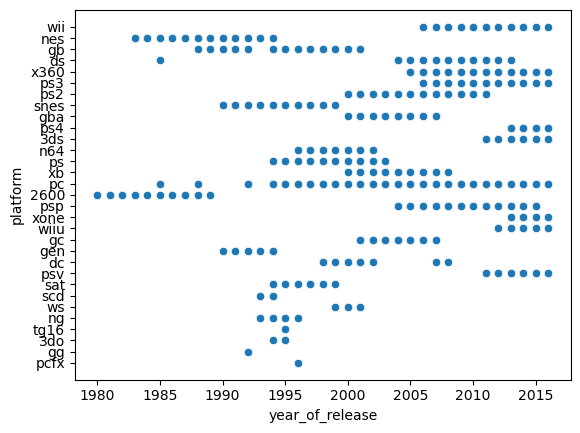

In [29]:
sns.scatterplot(x=data['year_of_release'], y=data['platform'])

Из графика выше видно, что активность платформ по годам сильно различается. Многие платформы устарели, например, платформа 2600 была только до 1990, GEN- до 1994, DC- до 2002 и т.д.соответственно изменилось время и факторы успеха должны были измениться.

Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.

In [30]:
#Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.
top10 = data.pivot_table(index='platform', values='total_sales', aggfunc='sum')\
.sort_values('total_sales', ascending=False).head(10)
top10

,total_sales
platform,
ps2,1233.56
x360,961.24
ps3,931.34
wii,891.18
ds,802.78
ps,727.58
ps4,314.14
gba,312.88
psp,289.53


Видно, что самые популярные игровые платформы за весь период это PS2, X360, PS3, WII, DS, PS.
Из первых 10 платформ по объемам продаж 5 мест занимают разные версии PS.

Далее, рассмотрим распределение продаж по каждой из топ 10 платформ по годам после 1994 года.

Сначала найдем объем продаж для каждой платформы по годам.

In [31]:
timeseries = data.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
timeseries.fillna(0, inplace=True)

#теперь выделим данные после 1994 года в датасет timeseries_actual
for platform in timeseries.columns:
    if platform not in top10.index:
        timeseries.drop(platform, axis=1, inplace=True)
        
timeseries_actual = timeseries[timeseries.index >= 1994]
timeseries_actual

platform,3ds,ds,gba,ps,ps2,ps3,ps4,psp,wii,x360
year_of_release,,,,,,,,,,
1994,0.00,0.00,0.00,6.03,0.00,0.00,0.00,0.00,0.00,0.00
1995,0.00,0.00,0.00,35.96,0.00,0.00,0.00,0.00,0.00,0.00
1996,0.00,0.00,0.00,94.70,0.00,0.00,0.00,0.00,0.00,0.00
1997,0.00,0.00,0.00,136.17,0.00,0.00,0.00,0.00,0.00,0.00
1998,0.00,0.00,0.00,169.49,0.00,0.00,0.00,0.00,0.00,0.00
1999,0.00,0.00,0.00,144.53,0.00,0.00,0.00,0.00,0.00,0.00
2000,0.00,0.00,0.07,96.37,39.17,0.00,0.00,0.00,0.00,0.00
2001,0.00,0.00,61.53,35.59,166.43,0.00,0.00,0.00,0.00,0.00
2002,0.00,0.00,74.16,6.67,205.38,0.00,0.00,0.00,0.00,0.00


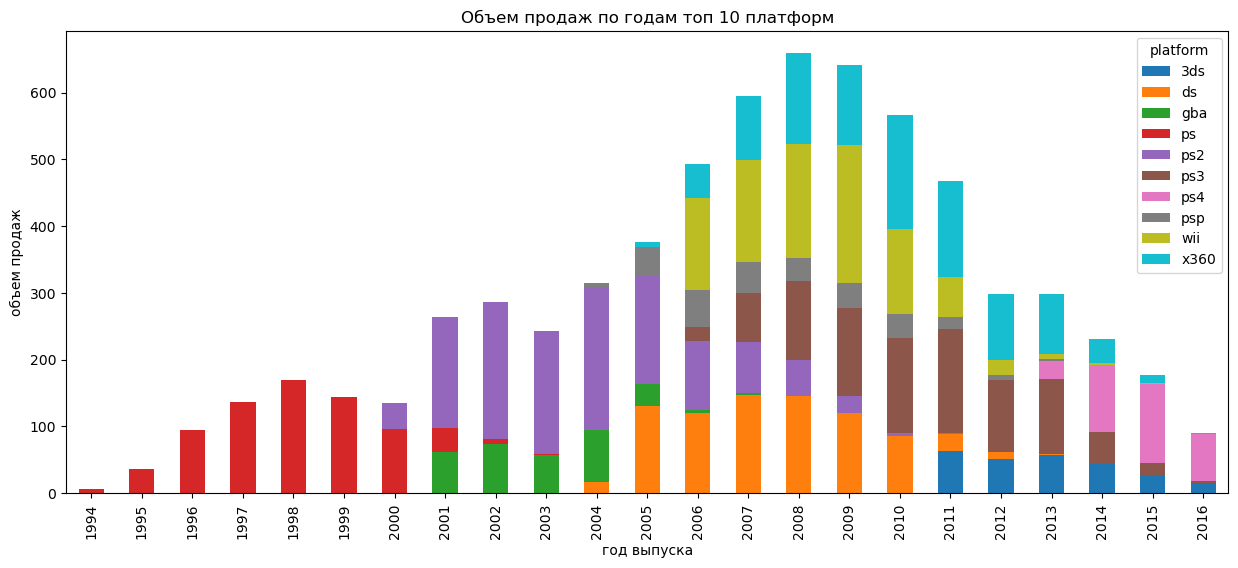

In [32]:
timeseries_actual.plot( kind='bar', figsize=(15, 6), stacked=True)
plt.title('Объем продаж по годам топ 10 платформ')
plt.xlabel('год выпуска')
plt.ylabel('объем продаж')
plt.show()

На графике видно, что из топ 10 платформ до 1999 на рынке присутствовала только PS.с 2000 года на ее смену выпустили PS2, которая далее ее вытеснила,в свою очередь  PS3 появилась в 2006 году и вплоть до 2016 года просуществовала. Платформа 3 DS пришла на смену DS в 2011 году. 
Из графка видна закономерность- существует определенный жизненный цикл у игровых платформ.

Найдем среднюю продолжительность жизни игровой платформы. Сначала создадим сводную таблицу, где соберем все платформы и количество лет, в тесение которых они выпускали игры.

In [33]:
temp = (data.loc[:,['year_of_release', 'platform']]
        .drop_duplicates()
        .pivot_table(index=['platform'], values='year_of_release', aggfunc='count')
        .sort_values('year_of_release', ascending=False)
       )
temp

,year_of_release
platform,
pc,26
gb,13
nes,12
x360,12
psp,12
ps2,12
wii,11
ds,11
ps3,11


Видно, что срок выпуска игр варьируется от 1 года до 26 лет. Выведем информацию по данным и возьмем медианное значение, которое не будет подвержено сильным выбросам.

In [34]:
temp.describe()

,year_of_release
count,31.000000
mean,7.677419
std,5.081910
min,1.000000
25%,4.000000
50%,7.000000
75%,11.000000
max,26.000000


В данном случае среднее и медиана не сильно различаются, можно сказать, что в среднем срок жизни платформы составляет 7-8 лет.

<a id='9-bullet'></a>
### Отбор данных за актуальный период- определение периода, данные за который помогут  прогноз на 2017 год

Из графика объема продаж по годам отчетливо виден ниспадающий тренд, начавшийся в 2013 году, можно предположить, что от количественных показателей продаж компании перешли к качетсвенным- не продавать как можно больше, а как можно лучше.с 2013 года Доля PS4 на рынке растет и имеет тренд к увеличению влияния на рынок, доля х360 к 2016 году снижается, как и 3 DS.

Таким образом считаю корректным взять для прогноза на 2017 года период с 2013-2016 годы.

Сделаем выборку из данных за период 2013-2016 годы.

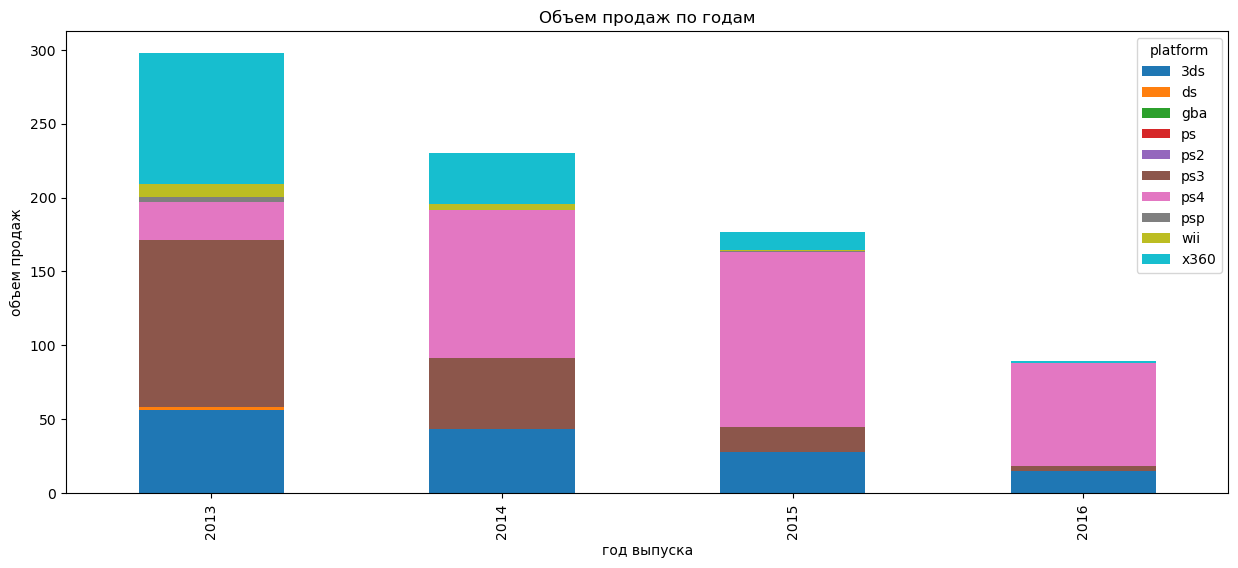

In [35]:
timeseries_actual = timeseries_actual.query('year_of_release >= 2013')
timeseries_actual.plot( kind='bar', figsize=(15, 6), stacked=True)
plt.title('Объем продаж по годам')
plt.xlabel('год выпуска')
plt.ylabel('объем продаж')
plt.show()


Как было сказано выше, в 2016 году активно влияет на рынок платформа PS4, тогда как лидеры по продажам 2013 года: PS3 и X360, — к 2015-2016 г. уже исчерпали свой коммерческий ресурс.

<a id='10-bullet'></a>
### Исследование глобальных продаж всех игр по платформам

In [36]:
actual_data = data.query('year_of_release >= 2013')

In [37]:
actual_data.pivot_table(index='platform', values='total_sales', aggfunc='sum')\
.sort_values('total_sales', ascending=False)

,total_sales
platform,
ps4,314.14
ps3,181.43
xone,159.32
3ds,143.25
x360,136.80
wiiu,64.63
pc,39.43
psv,32.99
wii,13.66


<a id='11-bullet'></a>
### Построение графика «ящик с усами» по глобальным продажам игр в разбивке по платформам

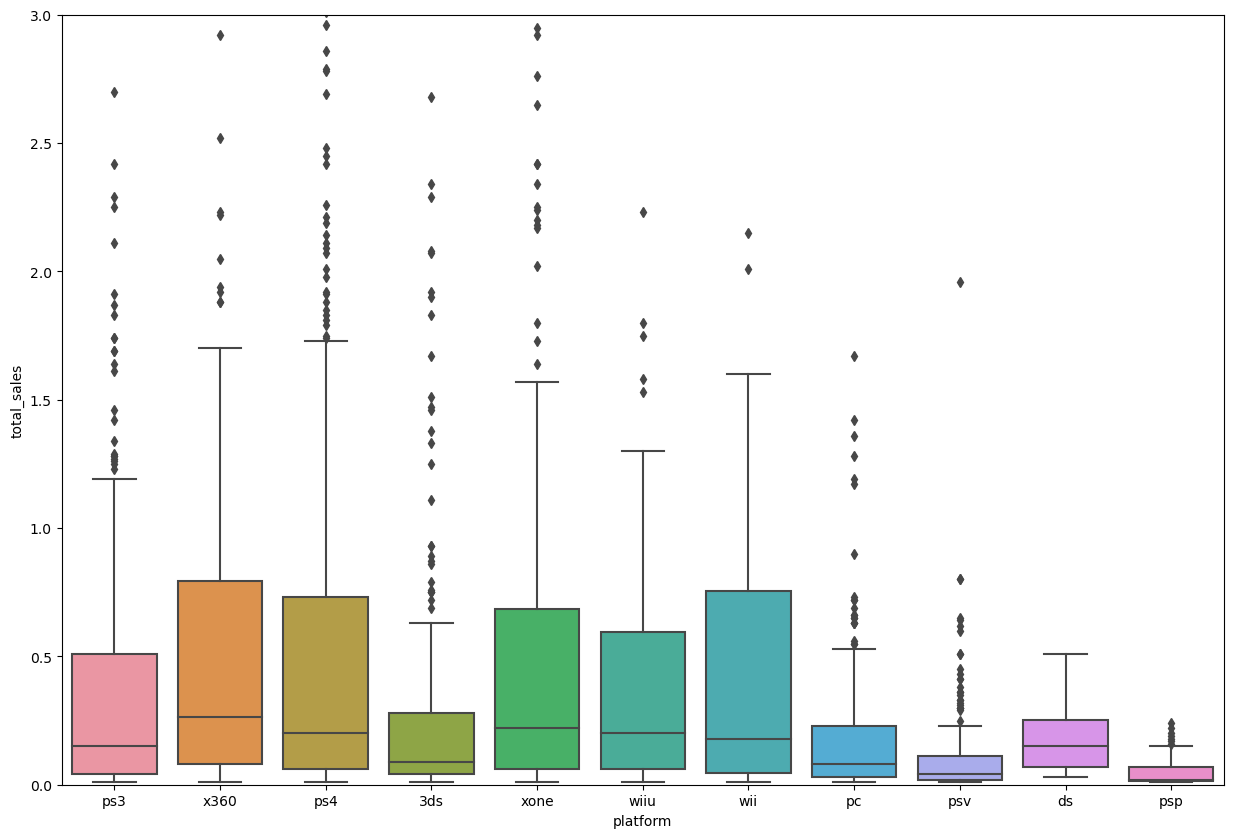

In [38]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=actual_data, x='platform', y='total_sales')
__ = plt.ylim(0, 3)

Из первого ящика с усами видно, что "ящики" видны плохо и делать точные выводы и сравнения -затруднительно, зато видно, что у полвовины платформ имеются серьезные выбросы по значениям.
Изменим масштаб ящика с усами, чтобы расммотреть значения медиан.

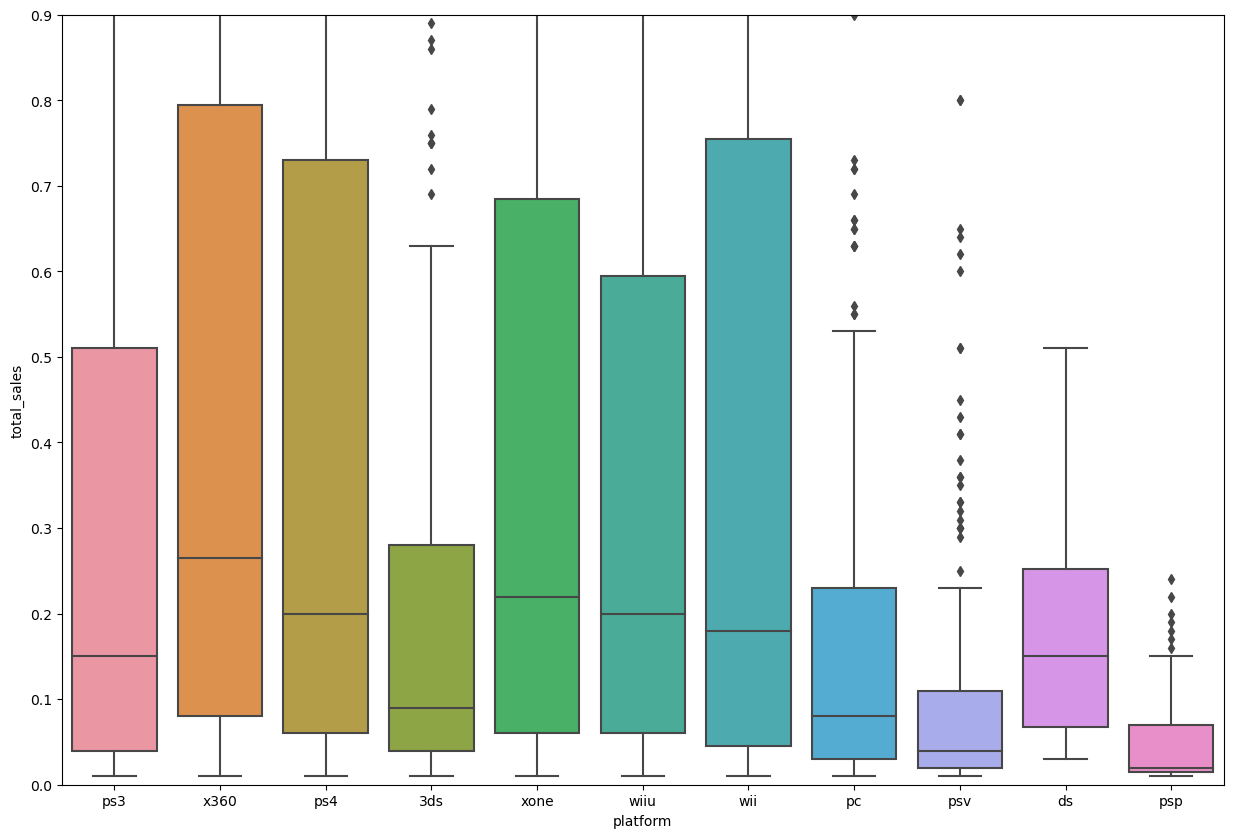

In [39]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=actual_data, x='platform', y='total_sales')
__ = plt.ylim(0, 0.9)

In [40]:
actual_data.groupby('platform')['total_sales'].describe().sort_values('50%', ascending=False)

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
x360,186.0,0.735484,1.663275,0.01,0.0800,0.265,0.7950,16.27
xone,247.0,0.645020,1.036139,0.01,0.0600,0.220,0.6850,7.39
ps4,392.0,0.801378,1.609456,0.01,0.0600,0.200,0.7300,14.63
wiiu,115.0,0.562000,1.038778,0.01,0.0600,0.200,0.5950,7.09
wii,23.0,0.593913,0.915432,0.01,0.0450,0.180,0.7550,3.58
ds,8.0,0.192500,0.172026,0.03,0.0675,0.150,0.2525,0.51
ps3,345.0,0.525884,1.451939,0.01,0.0400,0.150,0.5100,21.05
3ds,303.0,0.472772,1.381347,0.01,0.0400,0.090,0.2800,14.60
pc,189.0,0.208624,0.352304,0.01,0.0300,0.080,0.2300,3.05


- Исходя из графиков видно, что медиана  у всех платформ расположена на разных уровнях.
- Самые высокие медианные продажи у X360,XOne6, Wiiu и PS4, затем  Wii,PS3, DS, PC и 3DS,PSVи PSP на последнем месте.
- Положение Xbox One и PlayStation 4 можно объяснить тем, что данные приставки позднее остальных вышли на рынки. Часть стран увидела их в конце 2013, часть только во второй половине 2014.
- ПК на данном промежутке времени отошли на второй план, уступив место приставкам.

 <a id='12-bullet'></a>
 ### Влияние отзывов пользователей и критиков на продажи игр для PS4

Рассмотрим влияние отзывов пользователей и критиков на продажи игр на примере платформы PS4 - лидера по продажам в период 2013-2016 г.

In [41]:
actual_data = data.query('year_of_release >= 2013')
#так как изначально пропуски в рейтинге критиков и пользователей мы заменяли на -1 исключим теперь их из рассмотрения
ps4 = actual_data.query('platform == "ps4" and (user_score != -1) and (critic_score != -1)')
display(ps4.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
42,grand theft auto v,ps4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,fifa 16,ps4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
92,call of duty: advanced warfare,ps4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,fifa 17,ps4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
105,fallout 4,ps4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17


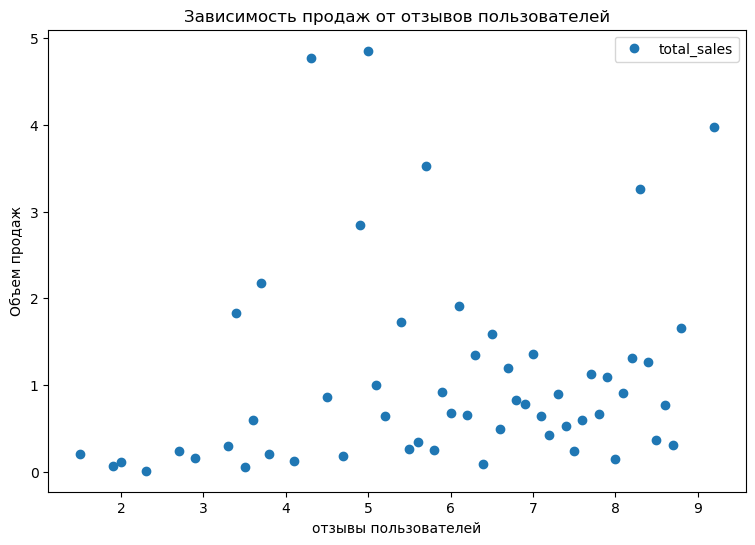

Корреляция продаж и отзывов пользователей: -0.034 



In [42]:
# Зависимость продаж от отзывов пользователей
(ps4.pivot_table(index='user_score', values='total_sales').plot(style='o', figsize=(9, 6)))
plt.title('Зависимость продаж от отзывов пользователей')
plt.xlabel('отзывы пользователей')
plt.ylabel('Объем продаж')
plt.show()
print('Корреляция продаж и отзывов пользователей:',round((ps4['total_sales'].corr(data['user_score'])),3)\
      ,'\n')

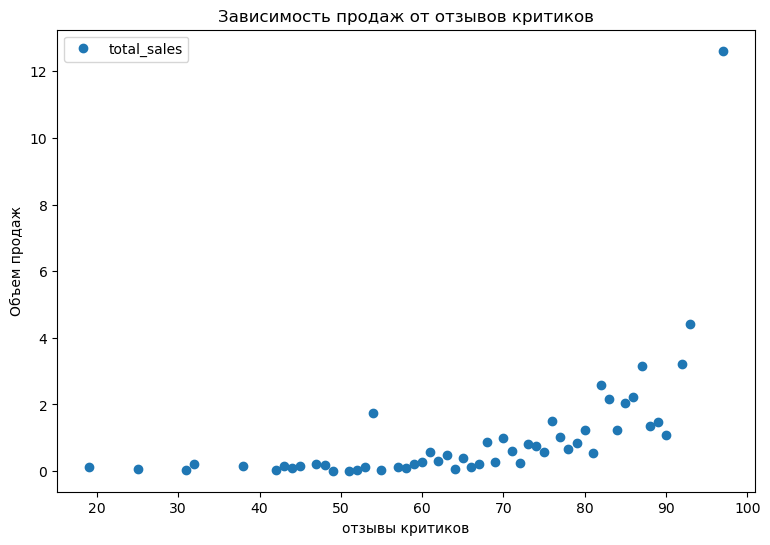

Корреляция продаж и отзывов критиков: 0.406 



In [43]:
# Зависимость продаж от отзывов критиков
(ps4.pivot_table(index='critic_score', values='total_sales').plot(style='o', figsize=(9, 6)))
plt.title('Зависимость продаж от отзывов критиков')
plt.xlabel('отзывы критиков')
plt.ylabel('Объем продаж')
plt.show()
print('Корреляция продаж и отзывов критиков:',round((ps4['total_sales'].corr(data['critic_score'])),3),'\n')

Оценки критиков демонстрируют прямую, средне-слабую корреляцию с "цифрами" продаж. Оценки пользователей корреляции с продажами не имеют. Коэффициенты корреляции 0,406 и -0,034  соответственно.

Проверим, не отличается ли эта зависимость на других платформах:

In [44]:
x360 = actual_data.query('platform == "x360" and (user_score != -1) and (critic_score != -1)')
print('Корреляция продаж и отзывов пользователей:',round((x360['total_sales'].corr(data['user_score'])),3),'\n')
print('Корреляция продаж и отзывов критиков:',round((x360['total_sales'].corr(data['critic_score'])),3),'\n')

Корреляция продаж и отзывов пользователей: -0.006 

Корреляция продаж и отзывов критиков: 0.35 



In [45]:
xone = actual_data.query('platform == "xone" and (user_score != -1) and (critic_score != -1)')
print('Корреляция продаж и отзывов пользователей:',round((xone['total_sales'].corr(data['user_score'])),3),'\n')
print('Корреляция продаж и отзывов критиков:',round((xone['total_sales'].corr(data['critic_score'])),3),'\n')

Корреляция продаж и отзывов пользователей: -0.094 

Корреляция продаж и отзывов критиков: 0.41 



In [46]:
xone = actual_data.query('platform == "xone" and (user_score != -1) and (critic_score != -1)')
print('Корреляция продаж и отзывов пользователей:',round((xone['total_sales'].corr(data['user_score'])),3),'\n')
print('Корреляция продаж и отзывов критиков:',round((xone['total_sales'].corr(data['critic_score'])),3),'\n')

Корреляция продаж и отзывов пользователей: -0.094 

Корреляция продаж и отзывов критиков: 0.41 



In [47]:
ps3 = actual_data.query('platform == "ps3" and (user_score != -1) and (critic_score != -1)')
print('Корреляция продаж и отзывов пользователей:',round((ps3['total_sales'].corr(data['user_score'])),3),'\n')
print('Корреляция продаж и отзывов критиков:',round((ps3['total_sales'].corr(data['critic_score'])),3),'\n')

Корреляция продаж и отзывов пользователей: 0.023 

Корреляция продаж и отзывов критиков: 0.334 



**Вывод**:  Для большинства  платформ можно говорить о средне выраженной линейной зависимости между отзывами критиков и продажами, в то время как линейной зависимсоти между продажами и  отзывами пользователей не выявлено.

<a id='13-bullet'></a>
### Распределение игр по жанрам:

In [48]:
genre_sales = actual_data.pivot_table(index='genre', values='total_sales', aggfunc='sum')
genre_sales['ratio'] = round(genre_sales['total_sales'] / genre_sales['total_sales'].sum()*100, 2)
genre_sales.sort_values('total_sales', ascending=False)

,total_sales,ratio
genre,,
Action,321.87,29.51
Shooter,232.98,21.36
Sports,150.65,13.81
Role-Playing,145.89,13.38
Misc,62.82,5.76
Platform,42.63,3.91
Racing,39.89,3.66
Fighting,35.31,3.24
Adventure,23.64,2.17


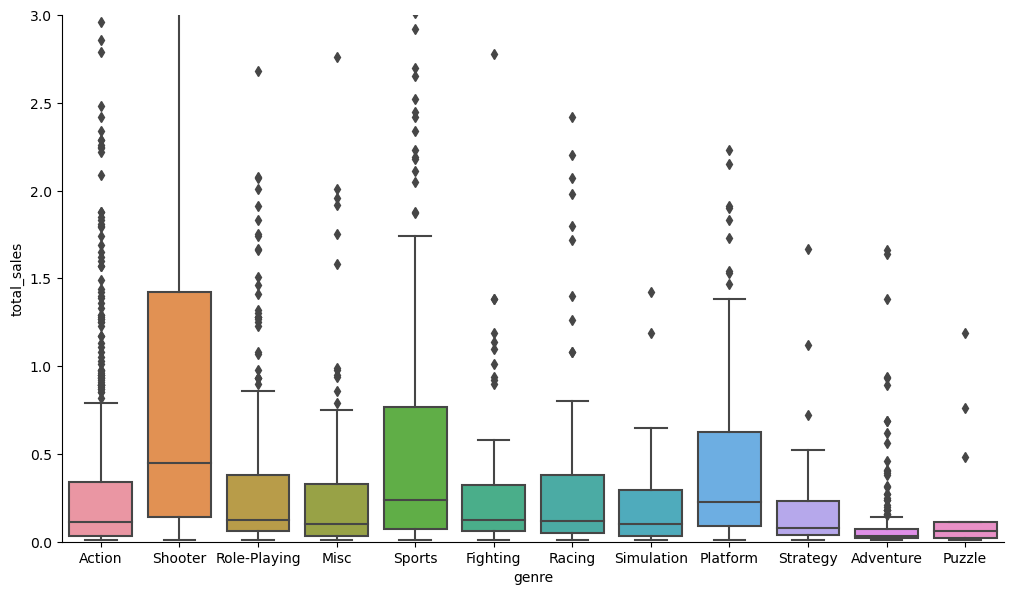

In [49]:
sns.catplot(x='genre', y='total_sales', kind="box", data=actual_data,height=6, aspect=1.7)
_ = plt.ylim(0, 3)

In [50]:
actual_data.groupby('genre')['total_sales'].describe().sort_values('50%', ascending=False)

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Shooter,187.0,1.245882,2.014107,0.01,0.14,0.450,1.4250,14.63
Sports,214.0,0.703972,1.219237,0.01,0.07,0.240,0.7650,8.58
Platform,74.0,0.576081,0.806808,0.01,0.09,0.225,0.6275,4.32
Role-Playing,292.0,0.499623,1.353164,0.01,0.06,0.125,0.3825,14.60
Fighting,80.0,0.441375,1.048883,0.01,0.06,0.125,0.3225,7.55
Racing,85.0,0.469294,0.964101,0.01,0.05,0.120,0.3800,7.09
Action,766.0,0.420196,1.253909,0.01,0.03,0.110,0.3375,21.05
Simulation,62.0,0.350968,0.849163,0.01,0.03,0.100,0.2950,5.22
Misc,155.0,0.405290,1.007985,0.01,0.03,0.100,0.3300,9.18


Как мы видим, shooter по средним продажам лидирует по сравнению с остальными жанрами игр, а action, напротив, по этому критерию отстает, однако, является в целом популярным жанром из-за наибольшего объема продаж. Приключенческие игры и игры-головоломки (puzzle), как правило, не пользуются большой популярностью: их абсолютные и средние продажи одни из самых низких среди всех жанров.

**Вывод по исследовательскому анализу данных:**

1) Количество игр на игровые приставки и компьютеры начало расти с большой скоростью с 90х годов до 2008 года. С 2008 года, после того как массово начали создавать мобильные приложения и мобильные игры, произошел резкий спад разработок игр на игровые платформы.

2) Самые популярные игровые платформы за весь период : Sony PlayStation 2(PS2), Xbox 360(X360), Sony Playstation 3(PS3), Nintendo WII(WII), Nintendo DS(DS), Sony Playstation( PS).

3) Средняя жизнь игровой платформы составляет 7-8 лет.

4) Больше всего было продано игр на Sony Playstation и Xbox 360.

5) У анализируемых нами платформ наблюдается взаимосвязь между продажами и оценками критиков. Пользовательские же оценки почти не играют значимой роли. Это значит, что для людей мнение критиков важнее мнения других пользователей.

6) Самый популярный жанр c 2013 года: 'Action'-наибольший объем продаж, самые низкие продажи у 'Puzzle'.

## Шаг 4 Портрет пользователя каждого региона¶

<a id='14-bullet'></a>
### Топ-5 платформ в Северной Америке, Европе и Японии:

In [51]:
na_platform=actual_data.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False).head()
na_platform['ratio'] = round(na_platform['na_sales'] / na_platform['na_sales'].sum()*100, 2)
na_platform

,na_sales,ratio
platform,,
ps4,108.74,28.23
xone,93.12,24.17
x360,81.66,21.20
ps3,63.50,16.48
3ds,38.20,9.92


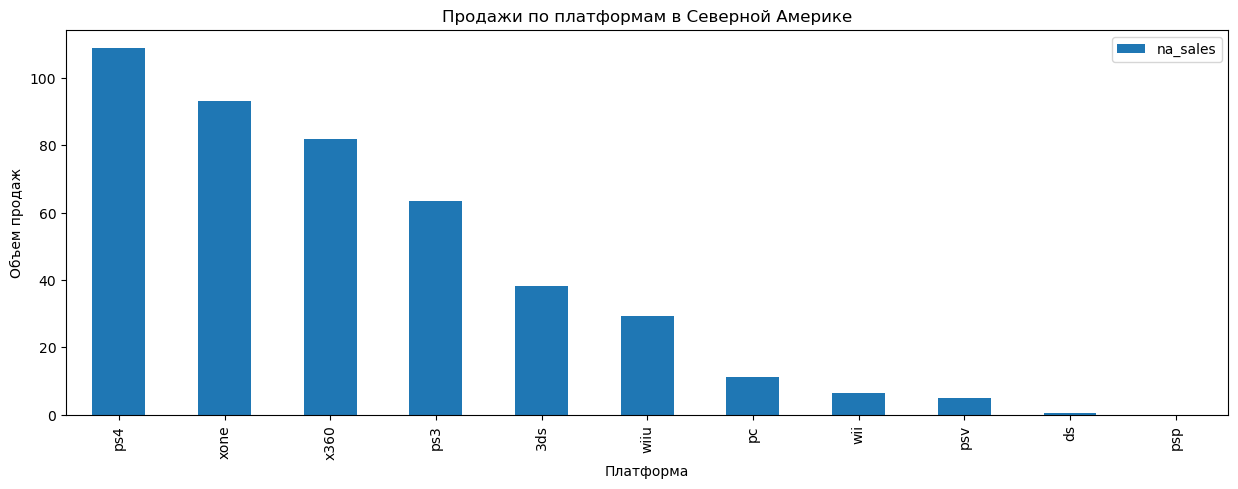

In [52]:
actual_data.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').sort_values(by='na_sales',ascending=False).plot(kind = 'bar', figsize=(15,5))
plt.title('Продажи по платформам в Северной Америке')
plt.xlabel('Платформа')
plt.ylabel('Объем продаж')
plt.show()

Пользователи Северной Америки больше всего предпочитают PS4,далее идет Xone и X360-американские консоли.

In [53]:
eu_platform=actual_data.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False).head()
eu_platform['ratio'] = round(eu_platform['eu_sales'] / eu_platform['eu_sales'].sum()*100, 2)
eu_platform

,eu_sales,ratio
platform,,
ps4,141.09,42.25
ps3,67.81,20.30
xone,51.59,15.45
x360,42.52,12.73
3ds,30.96,9.27


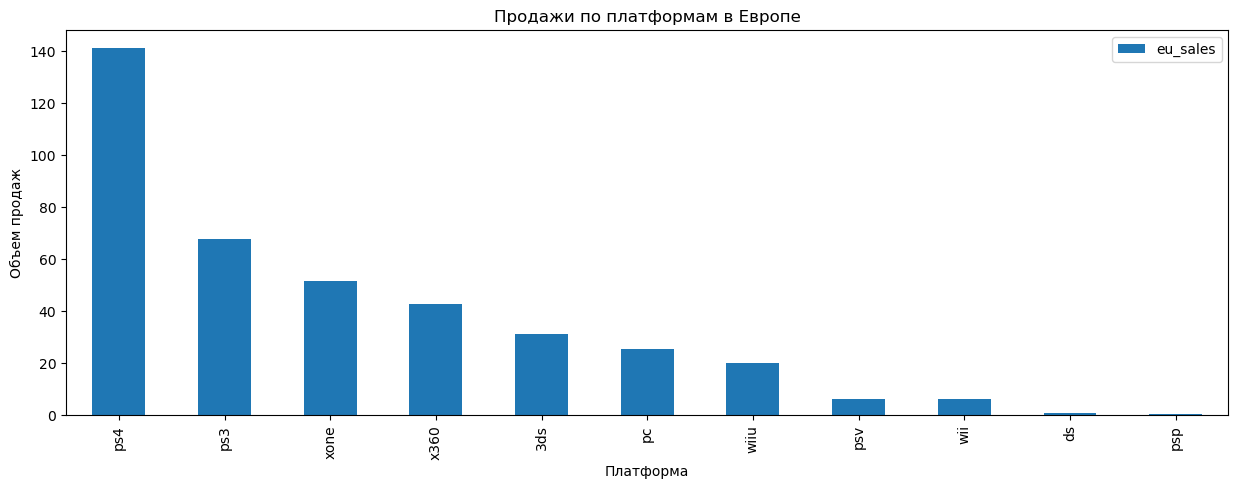

In [54]:
actual_data.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').sort_values(by='eu_sales',ascending=False).plot(kind = 'bar', figsize=(15,5))
plt.title('Продажи по платформам в Европе')
plt.xlabel('Платформа')
plt.ylabel('Объем продаж')
plt.show()

Пользователи Европы с 2013 года  больше всего предпочитают Японские  PS4 и PS3,далее идет Xone и X360-американские консоли.

In [55]:
jp_platform=actual_data.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False).head()
jp_platform['ratio'] = round(jp_platform['jp_sales'] / jp_platform['jp_sales'].sum()*100, 2)
jp_platform

,jp_sales,ratio
platform,,
3ds,67.81,49.64
ps3,23.35,17.09
psv,18.59,13.61
ps4,15.96,11.68
wiiu,10.88,7.97


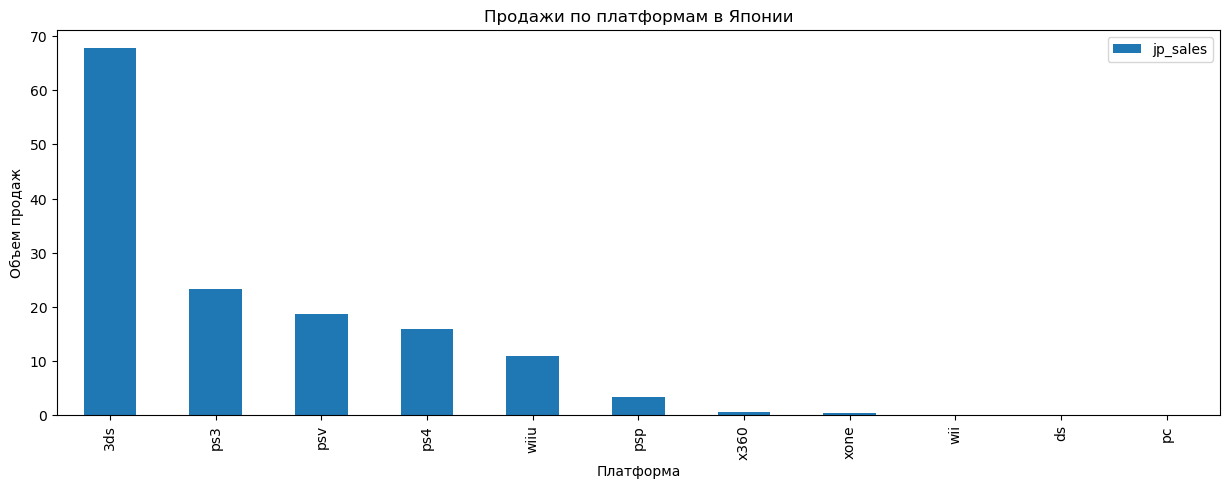

In [56]:
actual_data.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').sort_values(by='jp_sales',ascending=False).plot(kind = 'bar', figsize=(15,5))
plt.title('Продажи по платформам в Японии')
plt.xlabel('Платформа')
plt.ylabel('Объем продаж')
plt.show()

Пользователи Японии предпочитают с большим отрывом от остальных ( почти 50: рынка) портативные игровые системы- 3DS, это объясняется тем, что японцы очень технологически развитая нация с большой плотностью населения, квартиры маленькие, мобильность высокая, покупатели хотят играть на тех устройствах, которые легко взять с собой или не занимают много места.

<a id='15-bullet'></a>
### Самые популярные жанры (топ-5) в Северной Америке, Европе и Японии:

,na_sales,ratio
genre,,
Action,126.05,33.62
Shooter,109.74,29.27
Sports,65.27,17.41
Role-Playing,46.40,12.37
Misc,27.49,7.33


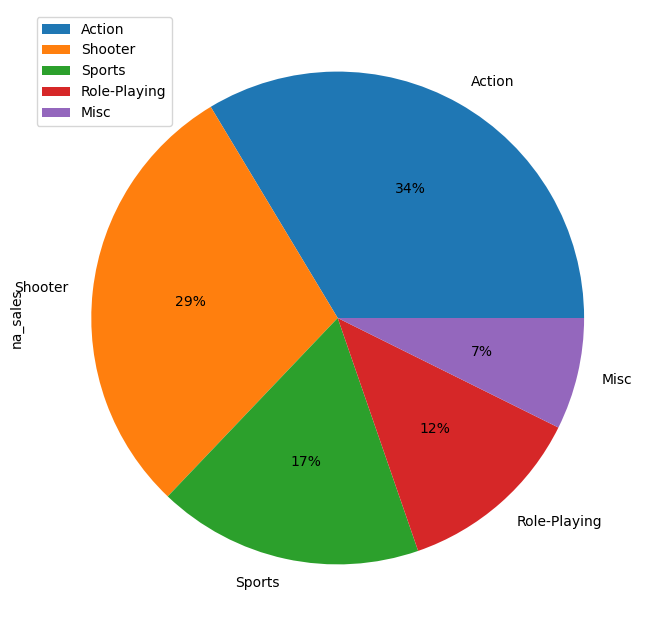

In [57]:
na_genre=actual_data.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False).head()
na_genre['ratio'] = round(na_genre['na_sales'] / na_genre['na_sales'].sum()*100, 2)
na_genre.plot(kind='pie',figsize=(12,8), y='na_sales', autopct='%1.0f%%')
plt.legend(loc='upper left')
na_genre

,eu_sales,ratio
genre,,
Action,118.13,36.50
Shooter,87.86,27.14
Sports,60.52,18.70
Role-Playing,36.97,11.42
Racing,20.19,6.24


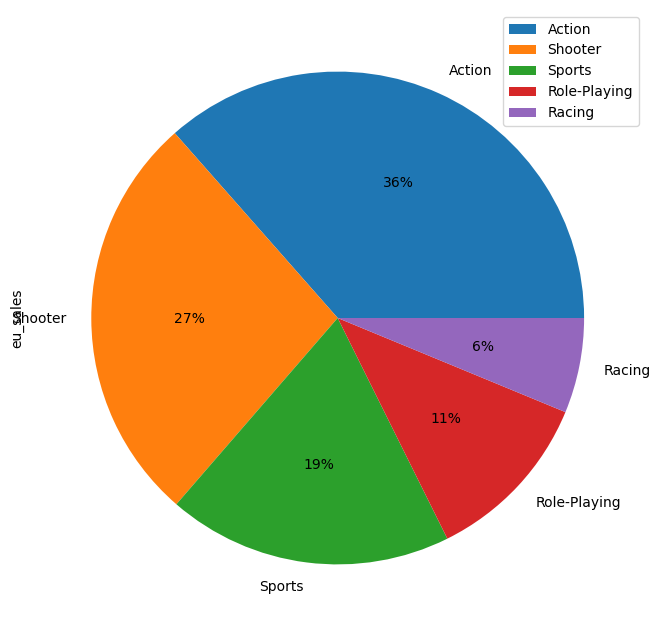

In [58]:
eu_genre=actual_data.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False).head()
eu_genre['ratio'] = round(eu_genre['eu_sales'] / eu_genre['eu_sales'].sum()*100, 2)
eu_genre.plot(kind='pie',figsize=(12,8), y='eu_sales', autopct='%1.0f%%')
eu_genre

,jp_sales,ratio
genre,,
Role-Playing,51.04,44.39
Action,40.49,35.21
Misc,9.20,8.00
Fighting,7.65,6.65
Shooter,6.61,5.75


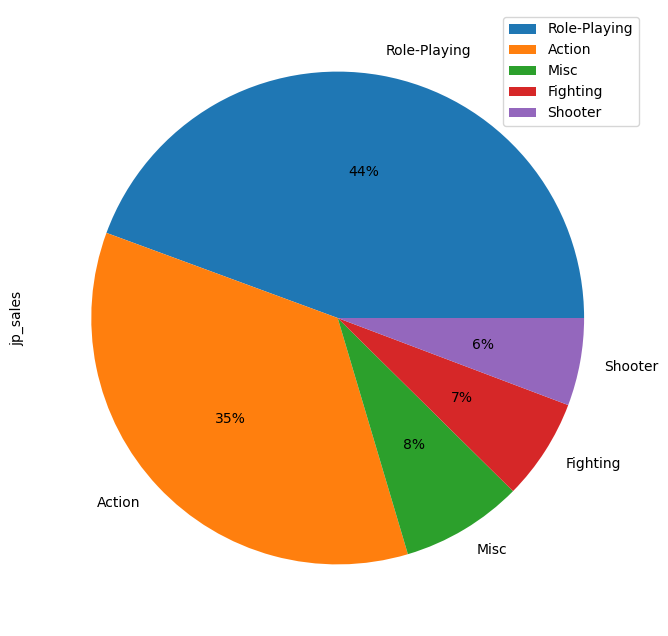

In [59]:
jp_genre=actual_data.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False).head()
jp_genre['ratio'] = round(jp_genre['jp_sales'] / jp_genre['jp_sales'].sum()*100, 2)
jp_genre.plot(kind='pie',figsize=(12,8), y='jp_sales', autopct='%1.0f%%')
jp_genre

**Вывод**

Пользователи Европы и Северной Америки играют в целом в одни и те же консоли и игровая индустрия больше развита в домашнем уюте, поэтому популярны жанры - Action, Sports, Shooter. В японии преобладают пользователи с портативными консолями, в которые можно играть не только дома, поэтому они предпочитают жанр - Role-Playing и Action и редко играют в игры с жанром - shooter.


<a id='16-bullet'></a>
### Влияние рейтинга ESRB на продажи в Северной Америке, Европе и Японии:

Выведем на экран все хначения рейтингов:

In [60]:
actual_data['rating'].unique()

array(['M', 'no_rating', 'E', 'T', 'E10+'], dtype=object)

Рейтинги ESRB (https://www.esrb.org/ratings-guide/):
- **E** - от 6 лет
- **E10+** - от 10 лет
- **T** - от 13 лет
- **M** - от 17 лет

In [62]:
for column in ['na_sales', 'eu_sales', 'jp_sales']:
    region = (actual_data.
              pivot_table(index='rating', values=column, aggfunc='sum').
              sort_values(column, ascending=False)
             )
    region['ratio'] = round(region[column] / region[column].sum()*100, 2)
    print(region)

           na_sales  ratio
rating                    
M            165.21  37.74
no_rating     89.42  20.43
E             79.05  18.06
E10+          54.24  12.39
T             49.79  11.38
           eu_sales  ratio
rating                    
M            145.32  37.05
E             83.36  21.25
no_rating     78.91  20.12
E10+          42.69  10.88
T             41.95  10.70
           jp_sales  ratio
rating                    
no_rating     85.05  60.41
T             20.59  14.63
E             15.14  10.75
M             14.11  10.02
E10+           5.89   4.18


Европа и Северная Америка отличаются по популярности рейтингов: на Западе популярностью пользуются игры для лиц старше 17 лет, тогда как в Японии первое место по продажам принадлежит играм без рейтинга. 
Такое предпочтение может быть следствием различия менталитетов и, в частоности, приверженности покупателей японской системе оценки (CERO — японская рейтинговая организация).

## Шаг 5 Проверка гипотез

<a id='17-bullet'></a>
### Проверим гипотезу, что пользовательские рейтинги платформ Xbox One и PC одинаковые.

Тогда  гопотеза Н0-средние пользовательские рейтинги платформ Xbox One и PC равны,

Н1-средние пользовательские рейтинги платформ Xbox One и PC различаются

Выберу уровень значимости равный 5%.

Эта гипотеза является двусторонней. Соответственно альтернативная гипотеза обратна ей. Для проверки использованы данные из двух выборок (оценок пользователей по каждой из платформ Xbox One и PC). Для оценки использован метод ttest_ind() который рассчитывает вероятность совпадения средних значений p-value. Дисперсии выборок не равны, поэтому параметр равной дисперсии equal_var == False

In [63]:
# убираем значения, которые были пропусками
actual_data = actual_data[actual_data['user_score'] != -1]
# Выделяем выборку по двум платформам
actual_data_xbox=actual_data[actual_data['platform'] == 'xone']
actual_data_pc=actual_data[actual_data['platform'] == 'pc']
# критический уровень статистической значимости
alpha = 0.05
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(actual_data_xbox['user_score'],actual_data_pc['user_score']\
                       ,equal_var=False)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.14759594013430466
Не получилось отвергнуть нулевую гипотезу


In [64]:
xone_pc = actual_data.query('platform == "xone" or platform == "pc"')
xone_pc.pivot_table(index='platform', values='user_score', aggfunc='median')

,user_score
platform,
pc,6.8
xone,6.8


Статистический тест показал, что **гипотезу о равенстве среднего пользовательского рейтинга для XOne и PC не получилось отвергнуть**. Если бы мы утверждали, что средние рейтинги для этих платформ различаются, мы бы допустили ошибку с вероятностью 15%.

<a id='18-bullet'></a>
### Проверим гипотезу, что пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Тогда  гопотеза Н0-пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны.

Н1-пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») различаются

Выберу уровень значимости равный 5%.

Для оценки использован метод ttest_ind() который рассчитывает вероятность совпадения средних значений p-value. Дисперсии выборок не равны, поэтому параметр равной дисперсии equal_var == False

In [65]:
actual_data = actual_data[actual_data['user_score'] != -1]
# Выделяем выборку по двум жанрам
actual_data_action=actual_data[actual_data['genre'] == 'Action']
actual_data_sports=actual_data[actual_data['genre'] == 'Sports']
# критический уровень статистической значимости
alpha = 0.05
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(actual_data_action['user_score'],\
                       actual_data_sports['user_score'],equal_var=False)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


In [66]:
action_sports = actual_data.query('genre == "Action" or genre == "Sports"')
action_sports.pivot_table(index='genre', values='user_score', aggfunc='mean')

,user_score
genre,
Action,6.837532
Sports,5.238125


Исходная гипотеза не подтвердилась: **можно утверждать с уверенностью, что средние пользовательские рейтинги для жанров Action и Sports различаются**. При выборе между продвижением игр двух жанров, *при прочих равных условиях* лучше отдать предпочтение жанру Action, так как рейтинг выше,чем в жанре Sports.

<a id='19-bullet'></a>
## Общий вывод

В ходе исследования проанализирована статистика продаж международного интернет-магазина компьютерных игр.

Выявлены закономерности в данных, определяющие успешность игры. В дальнейшем, результаты исследования позволят сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

При подготовке данных, названия столбцов, игр и платформ приведены к нижнему регистру. Преобразован тип данных некоторых полей, для оптимизации объема данных.

Отработаны пропуски. Проведена проверка на дубликаты. Созданы необходимые дополнительные столбцы.

Проанализировано сколько игр выпускалось в разные годы.Начиная с 1994 года можно отметить начало периода ощутимого роста рынка. С 2009 года, можно отметить начало периода падения рынка. Возможно это связано с ростом популярности соцсетей или с иной причиной.


Сформирован ТОП-10 платформ по объемам продаж. Лидерами за всю историю наблюдений являются платформы  PS2, X360, PS3, WII, DS, PS. Из первых 10 платформ по объемам продаж 5 мест занимают разные версии PS.


Проанализированы продажи по годам-наблюдается большой разброс по количеству лет работы крупнейших платформ. От года до 26 лет. Но медианный срок существования платформ 8 лет.

Для прогнозирования продаж 2017 года берем самые актуальные данные за последние 3 года т.е.  2014-2016, так как к 2016 большинство платформ в конце своего жизнненного цикла и строить прогнозы по ним некорректно.

Не смотря на падение рынка в 2016 году платформы PS4 и XOne занимают бОльшую долю рынка. Для планирования продаж 2017 года эти платформы наиболее перспективны.

Для большинства платформ можно говорить о средне выраженной линейной зависимости между отзывами критиков и продажами, в то время как линейной зависимости между продажами и отзывами пользователей не выявлено.


Проанализировано распределение игр по жанрам.По глобальным продажам есть три жанра-лидера Action,Shooter,Sports. Медианные значения на диаграммах размаха подтверждают вывод о лидерстве жанров Shooter, Sports и Platform. Т.е. это стабильные жанры, которые приносят доход не зависимо от платформы, значит на эти жанры есть устойчивый спрос!

В рамках исследования создан портрет пользователя по каждому региону.

Пользователи Северной Америки больше всего предпочитают PS4,далее идет Xone и X360-американские консоли.
Пользователи Европы с 2013 года больше всего предпочитают Японские PS4 и PS3,далее идет Xone и X360-американские консоли и DS3.
Пользователи Японии предпочитают с большим отрывом от остальных ( почти 50: рынка) портативные игровые системы- 3DS.

В ТОП-5 у трёх локаций есть общие жанры Shooter, Action, Role-Playing.

Жанр: Action или Shooter для Запада, Role-Playing и Action — для Японии.


Проанализировано влияние рейтинга ESRB на продажи в отдельном регионе.
Рейтинг ESRB: либо от 17 лет (для Америки и Европы) или "без рейтинга" (для Японии). 


Ориентироваться на оценки пользователей нет смысла, на продажи это не оказывает существенного влияния. Однако отзывы критиков не стоит упускать из внимания, их отзывы имеют значение. 

Стоит также отметить, что если пользовательский рейтинг все-таки будет важен создателям игры, то необходимо знать, что в жанре Action рейтинг пользователей, как правило, выше, чем в жанре Sports.

В рамках исследования проведена проверка основных гипотез.
Сформулирована нулевая гипотеза, о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.  В итоге, не получилось отвергнуть нулевую гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Т.к. полученная вероятность совпадения значений больше критического уровня статистической значимости, который определен аналитиком экспертно.

Также проверена гипотеза, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. Не получилось отвергнуть нулевую гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports разные. Т.к. полученная вероятность совпадения значений меньше критического уровня статистической значимости, который определен аналитиком экспертно.

Таким образом проведенное исследование позволило определить перспективные рынки, сегменты и локации для планирования продаж и продвижения в 2017 году, а также обосновать предложенный выбор.